In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [66]:
def load_csv(path):
    full = os.path.join('diabetes', path)
    return pd.read_csv(full)

full = load_csv('diabetic_data_original.csv')
original = load_csv('diabetic_data_balanced.csv')
df = original.copy()

In [33]:
df, labels = df.drop('readmitted', axis=1), df['readmitted']

In [34]:
to_drop = list(df.columns)
to_drop.remove('encounter_id')
df = df.drop(to_drop, axis=1)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_all, y_all = df.values, labels.values

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify=y_all, test_size=0.2)

print(f"Shape of train: {X_train_full.shape}, {y_train_full.shape}")
print(f"Shape of test: {X_test.shape}, {y_test.shape}")

Shape of train: (7999, 1), (7999,)
Shape of test: (2000, 1), (2000,)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=20, n_jobs=3, random_state=42)
cross_val_score(model, X_train, y_train, cv=5)

array([0.56679151, 0.576875  , 0.58536585, 0.57410882, 0.58411507])

In [40]:
cross_val_score(model, X_all, y_all, cv=5)

array([0.33333333, 0.09745127, 0.33333333, 0.33633634, 0.33383383])

In [63]:
def plot_stuff(df):
    plt.figure(figsize=(10,7))
    plt.scatter(df['readmitted'], df['encounter_id'].values, alpha=0.002)
    plt.xlabel("labels")
    plt.ylabel("encounter_id")
    plt.savefig("encounter_id is cheeky.png")

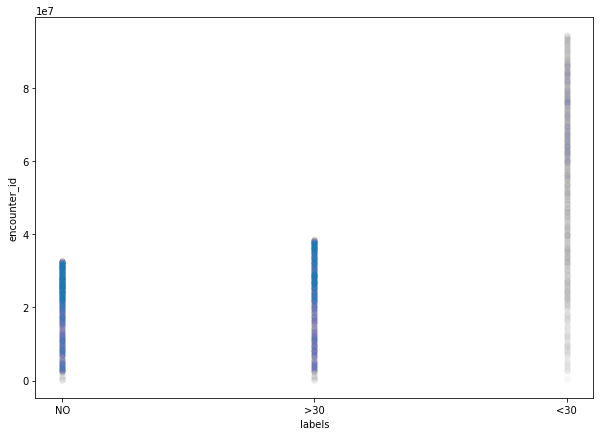

In [64]:
plot_stuff(original)

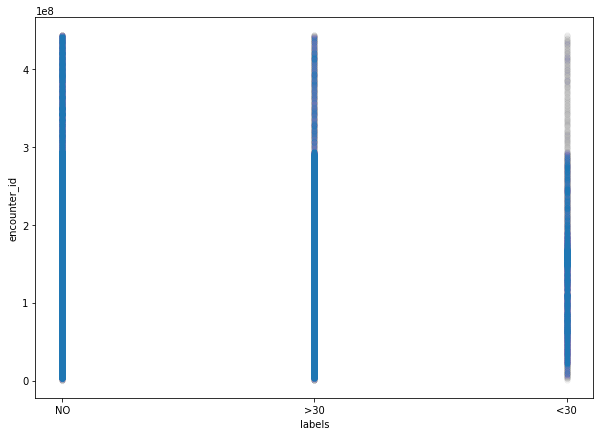

In [67]:
plot_stuff(full)